# Images and matrix algebra in Python

The cbook library

https://matplotlib.org/stable/api/cbook_api.html

In [1]:
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt

### 1. Open images with cbook:

To open images, we can use get_sample_data().

The image below was taken from:
 https://en.wikipedia.org/wiki/Cotopaxi#/media/File:Cotopaxi_volcano_2008-06-27T1322.jpg

In [2]:
# Put image into an object for which we need to provide the full path

image_file = cbook.get_sample_data("/Users/wladimir/Dropbox/Yachay_Tech/Semestre3_2023/Lectures/computational-physics-1/unit-2/Cotopaxi_volcano_2008-06-27T1322.jpeg")

# Inspect the object

print(type(image_file))


<class '_io.BufferedReader'>


### 2. We can use imread() to read images:

In [3]:
# New image object:
image = plt.imread(image_file)

print(type(image))

print(image.shape)

<class 'numpy.ndarray'>
(462, 900, 3)


### 3. Identify the rasters

### The imshow() function

This function can be called to display data as an image on a 2D regular raster.

Image taken from: https://docs.qgis.org/3.4/en/docs/gentle_gis_introduction/raster_data.html


We notice we have a three-layered RGB image.

### 4. Represent full image:

plt.imshow()

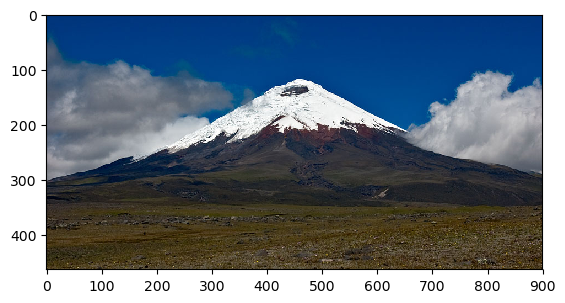

In [4]:
plt.figure()

plt.imshow(image)

plt.show()

### 5. See composition

#### How is an image composed?

An image is composed of several layers. In this case, RGB format, we have 3 layers.

R -> pixels can take values between 0, 255 (intensity)


B -> pixels can take values between 0, 255 (intensity)


G -> pixels can take values between 0, 255 (intensity)

In [5]:
print(image.shape)

(462, 900, 3)


In [6]:
# Use indexing:

imageR = image[:, :, 0]
imageG = image[:, :, 1]
imageB = image[:, :, 2]

print(imageR.shape, imageG.shape, imageB.shape)

(462, 900) (462, 900) (462, 900)


### 6. Plot the different colours:

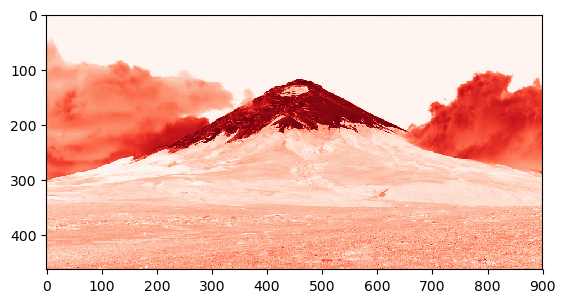

In [7]:
plt.figure()

plt.imshow(imageR, cmap = "Reds")

plt.show()

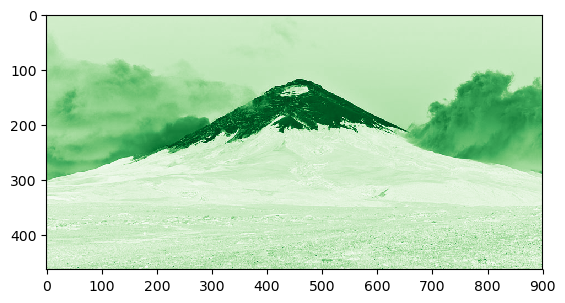

In [8]:
plt.figure()

plt.imshow(imageG, cmap = "Greens")

plt.show()

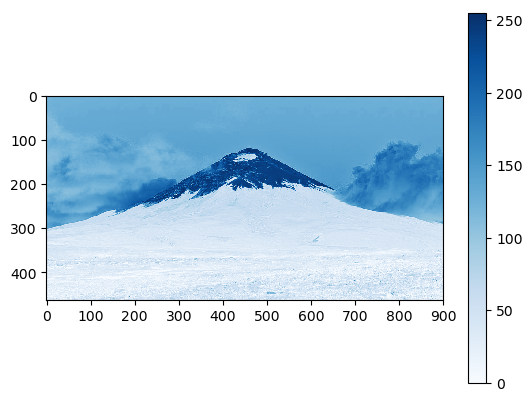

In [43]:
plt.figure()

plt.imshow(imageB, cmap = "Blues")
plt.colorbar()

plt.show()

### 7. Analyse individual layers

#### Important

- Images are layered matrices of the form ($m\times n$)!

- We can then use linear algebra and all sort of linear operations on them.

- Computationally speaking images are arrays.

In [10]:
import numpy as np

In [11]:
print(imageR.shape)
print(imageG.shape)
print(imageB.shape)

print(type(imageR[0][0]))
print(type(imageG[0][0]))
print(type(imageB[0][0]))

print(np.min(imageR), np.max(imageR))
print(np.min(imageG), np.max(imageG))
print(np.min(imageB), np.max(imageB))

(462, 900)
(462, 900)
(462, 900)
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
0 255
0 255
0 255


In [12]:
# Get the total pixel count:
print(imageR.size)
print(imageG.size)
print(imageB.size)


415800
415800
415800


### 8. Pixel histograms:

If we have 2D arrays, it is better to linearise them/reshape them into 1D arrays.


See documentation: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [14]:
# Reshape them into 1D arrays (flatten)
imageR_1D = np.reshape(imageR, (imageR.size, 1))
imageB_1D = np.reshape(imageB, (imageB.size, 1))                   
imageG_1D = np.reshape(imageG, (imageG.size, 1))
                       
print(imageR_1D.shape, imageB_1D.shape, imageG_1D.shape)
                                     

(415800, 1) (415800, 1) (415800, 1)


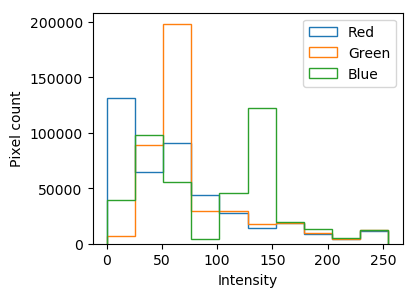

In [20]:
# Plotting some histograms

plt.figure(figsize=(4,3))
plt.hist(imageR_1D, histtype='step', label='Red')
plt.hist(imageG_1D, histtype='step', label='Green')
plt.hist(imageB_1D, histtype='step', label='Blue')
plt.xlabel("Intensity")
plt.ylabel("Pixel count")
plt.legend()
plt.show()

### Image manipulation:

#### Transpose:

In [23]:
imageR_transpose = imageR.T
#imageR_transpose = imageR.transpose()

print(imageR.shape, imageR_transpose.shape)

(462, 900) (900, 462)


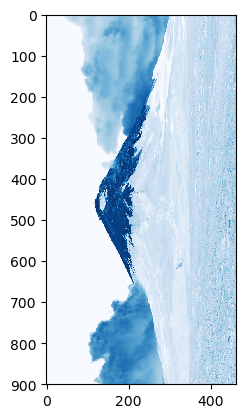

In [24]:
plt.figure()

plt.imshow(imageR_transpose, cmap = "Blues")

plt.show()

### Adding matrices:

In [25]:
sum_image = imageR + imageG + imageB

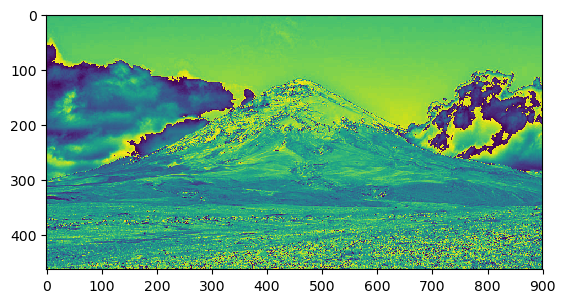

In [26]:
plt.figure()

plt.imshow(sum_image, cmap = "viridis")

plt.show()

#### Masking:

In [27]:
import matplotlib.patches as patches

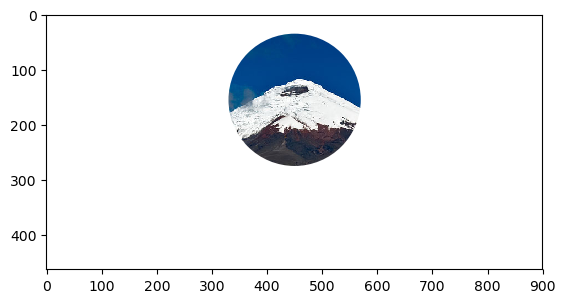

In [29]:
fig, ax = plt.subplots()

im = ax.imshow(image)

patch = patches.Circle((450, 154), \
                       radius=120, transform=ax.transData)

im.set_clip_path(patch)

plt.show()

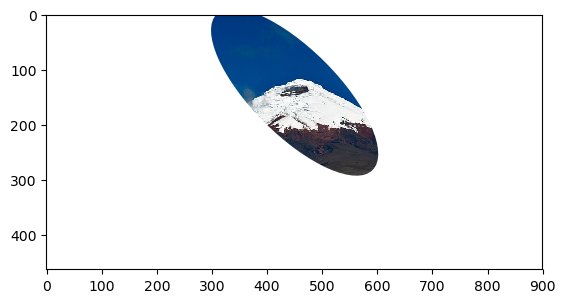

In [36]:
fig, ax = plt.subplots()

im = ax.imshow(image)

patch = patches.Ellipse((450, 140),width =400, height=155,\
                        angle=45.0, transform=ax.transData)

im.set_clip_path(patch)

plt.show()

### Atenuate colours:

In [39]:
# Divide intensities by 2:
imageB_at = imageB//2

# Flatten the array into 1D
imageB_at_1D = np.reshape(imageB_at, (imageB_at.size, 1))

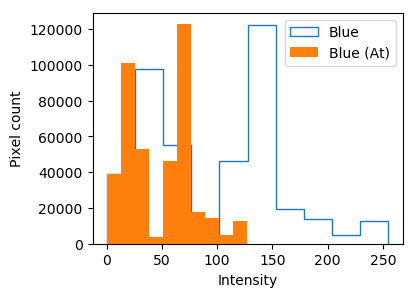

In [42]:
# Plotting some histograms

plt.figure(figsize=(4,3))
plt.hist(imageB_1D, histtype='step', label='Blue')
plt.hist(imageB_at_1D, label='Blue (At)')

plt.xlabel("Intensity")
plt.ylabel("Pixel count")
plt.legend()
plt.show()

In [54]:
# New atenuated image
image_at = np.zeros((462, 900, 3), dtype = int)

print(image_at.shape)

(462, 900, 3)


In [55]:
# Lets assing the layers:

image_at[:, :, 0] = imageR
image_at[:, :, 1] = imageG
image_at[:, :, 2] = imageB_at

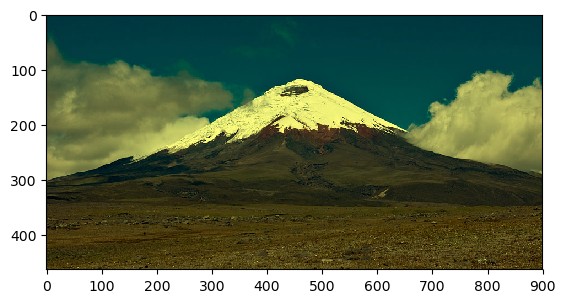

In [56]:
plt.figure()

plt.imshow(image_at)

plt.show()